# SSVEP Data Set

The dataset is about 928 MB from 102 subjects. EEG and Impedance data are saved as MATLAB MAT
files. The sample rate is 1000Hz and all data are downsampled to 250Hz from raw data without any
other processing. Each EEG file is named as “Subject index ” (i.e., S001.mat, S002.mat, …, S102.mat).
For each file, a 5-D matrix named “data” with dimensions of [8, 710, 2, 10, 12]. The five dimensions
indicate “Channel index”, “Time points”, “Electrode index”（1:dry, 2:wet）, “Block index” and “Target
index” respectively. The channel index are corresponding to POz, PO3, PO4, PO5, PO6, Oz, O1, O2. In
terms of single subject, the data matrix consists of 240 trials (12 targets × 10 blocks × 2 electrodes)
and each trial consists of 8 channels of 710-point data. The data length of 2.84 seconds (i.e. 2.84×250
= 710 time points) include 0.5 s before stimulus onset, 2 s for stimulation, 0.14 s visual latency, and
0.2 s after stimulus offset. To keep all original information, the data epochs were directly extracted
from the raw continuous data without any processing.
The electrode impedances recorded before each block were provided in the data matrix of
‘Impedance.mat’ with dimensions of [8, 10, 2, 102]. The channel index are corresponding to POz, PO3,
PO4, PO5, PO6, Oz, O1, O2. The numbers in the four dimensions represent the number of channels,
blocks, headband types (1: wet, 2: dry) and subjects respectively. The impedance information can be
used to study the relationship be-tween impedance and BCI performance.
The “Subjects_information.mat” file lists the information of all 102 subjects together with a
questionnaire on the comfort level and preference of the two headbands after the experiment. For
each participant, there are 10 columns of parameters (factors). The first 4 columns are the subjects’
personal information including “subject index”, “gender”, “age”, and “dominant hand”. The 6
columns(5th-10th) are listed as results in questionnaires, which are “Comfort of dry electrode
headband”, “Wearing time of dry electrode when pain occurs”, “Comfort of wet electrode headband”,
“Wearing time of wet electrode when pain occurs”, “Only consider comfort, headband preference”
and “comprehensively consider comfort and convenience (need assistance from others, conductive
paste, shampoo, etc.), headband preference". The last column shows the order of wearing the two
headbands.
The “stimulation_information.pdf” file lists the stimulation parameters of the 12 characters, including
frequency and phase information of each character..eadbands.nce.rocessing.

In [2]:
import os
import urllib.request
import zipfile
import shutil
import scipy.io
import matplotlib.pyplot as plt

In [3]:
folderPath = os.path.join(os.getcwd(), 'SSVEP_BCI_Dataset')

In [4]:
if not os.path.exists(folderPath):
    os.makedirs(folderPath)
    print(f"Folder '{folderPath}' created.")
else:
    print(f"Folder '{folderPath}' already exists.")

Folder 'D:\Git\xEEG\SSVEP_BCI_Dataset' already exists.


In [5]:
baseURL = 'https://bci.med.tsinghua.edu.cn/upload/zhufangkun/'
fileNames = ['S001-S010.zip','S011-S020.zip','S021-S030.zip','S031-S040.zip','S041-S050.zip','S051-S060.zip',
            'S061-S070.zip','S071-S080.zip','S081-S090.zip','S091-S102.zip']

In [6]:
for fileName in fileNames:
    urlPath = baseURL+fileName
    fPath = os.path.join(folderPath,fileName)
    if not os.path.exists(fPath):
        print("File does not exist. Downloading the file...")
    
        # Download the file from the given URL
        urllib.request.urlretrieve(urlPath, fPath)
        print(f"File '{fileName}' downloaded successfully.")
    else:
        print(f"File '{fileName}' already exists.")

print('Please unzip the files')

File 'S001-S010.zip' already exists.
File 'S011-S020.zip' already exists.
File 'S021-S030.zip' already exists.
File 'S031-S040.zip' already exists.
File 'S041-S050.zip' already exists.
File 'S051-S060.zip' already exists.
File 'S061-S070.zip' already exists.
File 'S071-S080.zip' already exists.
File 'S081-S090.zip' already exists.
File 'S091-S102.zip' already exists.
Please unzip the files


### After extracting all file in one folder

In [8]:
matFiles = [f for f in os.listdir(folderPath) if f.endswith('.mat')]

# Print all the .mat files
if matFiles:
    print("MAT files in the folder:")
    for matFile in matFiles:
        print(os.path.join(folderPath,matFile))
else:
    print("No .mat files found in the folder.")

MAT files in the folder:
D:\Git\xEEG\SSVEP_BCI_Dataset\S001.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S002.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S003.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S004.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S005.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S006.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S007.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S008.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S009.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S010.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S011.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S012.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S013.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S014.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S015.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S016.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S017.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S018.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S019.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S020.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S021.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S022.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S023.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S024.mat
D:\Git\xEEG\SSVEP_BCI_Dataset\S025.mat


In [9]:
matData = scipy.io.loadmat(os.path.join(folderPath,matFiles[0]))
matData

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan 11 11:05:30 2021',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[[[[-5.23255201e+04, -5.68069104e+04, -5.84248190e+04, ...,
            -6.20369948e+04, -5.62659089e+04, -5.66152666e+04],
           [-4.45458171e+04, -4.30693950e+04, -4.22438110e+04, ...,
            -4.44188591e+04, -4.37110241e+04, -4.19588710e+04],
           [-3.16225309e+04, -3.47089490e+04, -2.96362656e+04, ...,
            -2.96465027e+04, -3.32901051e+04, -3.20369322e+04],
           ...,
           [-6.26926161e+03, -6.11521340e+03, -8.41708531e+03, ...,
            -7.50620708e+03, -9.69524739e+03, -9.34401210e+03],
           [-1.15701563e+03, -2.16409577e+02, -2.78185325e+03, ...,
            -3.48240158e+01, -2.68667952e+02,  4.35858991e+01],
           [-3.91361141e+03, -4.15684308e+03, -4.29761435e+03, ...,
            -3.28177233e+03, -4.69346372e+03, -4.07597447e+03]],
 
          [[ 1.10087699e+04,  1.10500760e+

## Data extraction
For each file, a 5-D matrix named “data” with dimensions of [8, 710, 2, 10, 12]. The five dimensions indicate “Channel index”, “Time points”, “Electrode index”（1:dry, 2:wet）, “Block index” and “Target index” respectively.

In [11]:
matData['data'].shape

(8, 710, 2, 10, 12)

In [12]:
data = matData['data']
data

array([[[[[-5.23255201e+04, -5.68069104e+04, -5.84248190e+04, ...,
           -6.20369948e+04, -5.62659089e+04, -5.66152666e+04],
          [-4.45458171e+04, -4.30693950e+04, -4.22438110e+04, ...,
           -4.44188591e+04, -4.37110241e+04, -4.19588710e+04],
          [-3.16225309e+04, -3.47089490e+04, -2.96362656e+04, ...,
           -2.96465027e+04, -3.32901051e+04, -3.20369322e+04],
          ...,
          [-6.26926161e+03, -6.11521340e+03, -8.41708531e+03, ...,
           -7.50620708e+03, -9.69524739e+03, -9.34401210e+03],
          [-1.15701563e+03, -2.16409577e+02, -2.78185325e+03, ...,
           -3.48240158e+01, -2.68667952e+02,  4.35858991e+01],
          [-3.91361141e+03, -4.15684308e+03, -4.29761435e+03, ...,
           -3.28177233e+03, -4.69346372e+03, -4.07597447e+03]],

         [[ 1.10087699e+04,  1.10500760e+04,  1.10372461e+04, ...,
            1.10914267e+04,  1.08384049e+04,  1.08126110e+04],
          [ 1.13341219e+04,  1.13126195e+04,  1.14144541e+04, ...,
      

In [13]:
len(data[0,:,0,0,0])

710

In [14]:
data[0,:,0,0,0]

array([-52325.52005801, -53157.22841962, -55446.94098514, -55945.6530777 ,
       -54100.159055  , -52305.26937874, -53125.44424089, -55421.68351541,
       -55941.98739183, -54096.04633427, -52301.11195452, -53097.28104456,
       -55410.15001596, -55950.92808908, -54112.40781024, -52307.19162865,
       -53108.50161961, -55412.02756238, -55950.03401935, -54102.03660143,
       -52301.46958241, -53099.87384676, -55402.41631284, -55930.94563073,
       -54100.20375849, -52299.18970461, -53100.85732346, -55408.13835908,
       -55918.29454412, -54063.90452766, -52283.72229837, -53103.36071869,
       -55421.32588752, -55962.81921642, -54115.26883336, -52293.82528626,
       -53054.18688382, -55369.11221559, -55930.99033421, -54093.76645647,
       -52260.70000295, -53022.53681556, -55404.47267321, -55962.10396064,
       -54150.62929098, -52296.32868149, -53063.17228455, -55373.40375026,
       -55958.12535036, -54121.92965281, -52266.15382827, -53028.5717862 ,
       -55364.68657045, -

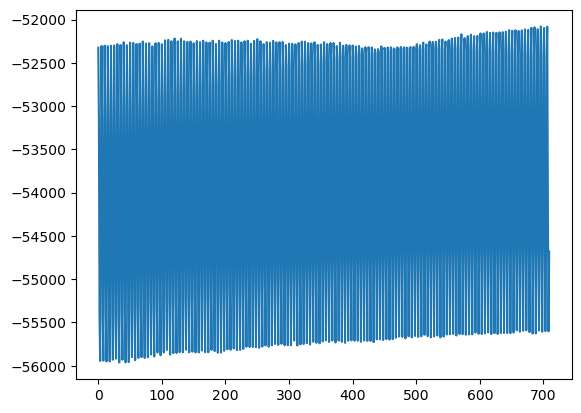

In [15]:
plt.plot(data[0,:,0,0,0])
plt.show()